In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from net.network import NetA, ResNet

In [2]:
def load_obj():
    with open('./losses.pkl', 'rb') as f:
        data = pickle.load(f)
    return data

data = load_obj()
for k, v in data.items():
    if data[k]['MODEL'] == NetA:
        data[k]['MODEL'] = 'NetA'
    elif data[k]['MODEL'] == ResNet:
        data[k]['MODEL'] = 'ResNet'

df = pd.DataFrame.from_dict(data, orient='index')
df

,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu,NBFUNCS
Standard\500N31\20200704T115102,"{'loss_a': [0.0014008926153182984, 0.001366454...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\500N31\20200704T120619,"{'loss_a': [0.0010492830276489257, 0.001015375...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\10000N31\20200704T121209,"{'loss_a': [5.839865803718567e-05, 5.647708177...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard\10000N31\20200704T124332,"{'loss_a': [8.24008125, 7.69129140625, 0.36565...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burgers\10000N31\20200704T151344,"{'loss_a': [4.11263984375, 3.829959375, 0.4715...",Burgers,ResNet,5,0,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training\Standard\1000N31\ResNet_MSE_epochs10_blocks0_20200804T103153,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Standard,ResNet,5,0,0.1,MSE,32.0,0.092982,2.997084,1.893641,0.097595,0.976413,1.220353,1.0
training\Standard\1000N31\ResNet_MSE_epochs10_blocks0_20200804T103216,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Standard,ResNet,5,0,0.1,MSE,32.0,0.101354,3.248054,2.066477,0.113214,1.088571,1.371886,2.0
training\Standard\1000N31\ResNet_MSE_epochs10_blocks0_20200804T103238,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Standard,ResNet,5,0,0.1,MSE,32.0,0.162348,4.876379,3.007389,0.195261,1.739263,2.221768,4.0
training\Standard\1000N31\ResNet_MSE_epochs10_blocks0_20200804T103300,"{'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Standard,ResNet,5,0,0.1,MSE,32.0,0.169213,5.241678,3.306320,0.191221,1.628474,2.006745,8.0


In [3]:
df['EQUATION'].unique()

array(['Standard', 'Burgers', 'Helmholtz'], dtype=object)

# Helmholtz Equation

This section is analysis of the Helmholtz equation.

In [4]:
he = df[df['Equation'.upper()] == 'Helmholtz']
he['Model'] = he.index

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
he

,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu,NBFUNCS,Model
Helmholtz\50N63\20200706T115526,"{'loss_a': [148554.15, 142448.58, 21783.16, 15...",Helmholtz,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T115526
Helmholtz\50N63\20200706T115634,"{'loss_a': [205384.0, 196571.16, 41155.9325, 2...",Helmholtz,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T115634
Helmholtz\50N63\20200706T120355,"{'loss_a': [214138.82, 198694.62, 63567.815, 4...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\50N63\20200706T120355
Helmholtz\500N63\20200706T131600,"{'loss_a': [73985.424, 69449.904, 30671.744, 1...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helmholtz\500N63\20200706T131600
training\Helmholtz\500N63\20200706T132634,"{'loss_a': [223537.888], 'loss_u': [78597.544]...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T132634
training\Helmholtz\500N63\20200706T133503,"{'loss_a': [135917.52], 'loss_u': [93228.16], ...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T133503
training\Helmholtz\500N63\20200706T144256,"{'loss_a': [325869.952, 302075.936, 81163.936,...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T144256
training\Helmholtz\500N63\20200706T144501,"{'loss_a': [98709.56, 92274.208, 32568.536, 20...",Helmholtz,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\500N63\20200706T144501
training\Helmholtz\1000N63\20200706T212157,"{'loss_a': [40.6003984375, 37.7735390625, 28.0...",Helmholtz,NetA,5,2,0.0,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\1000N63\20200706T212157
training\Helmholtz\50N63\20200706T215507,"{'loss_a': [24.02490234375, 23.66933349609375,...",Helmholtz,ResNet,5,0,0.0,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Helmholtz\50N63\20200706T215507


C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


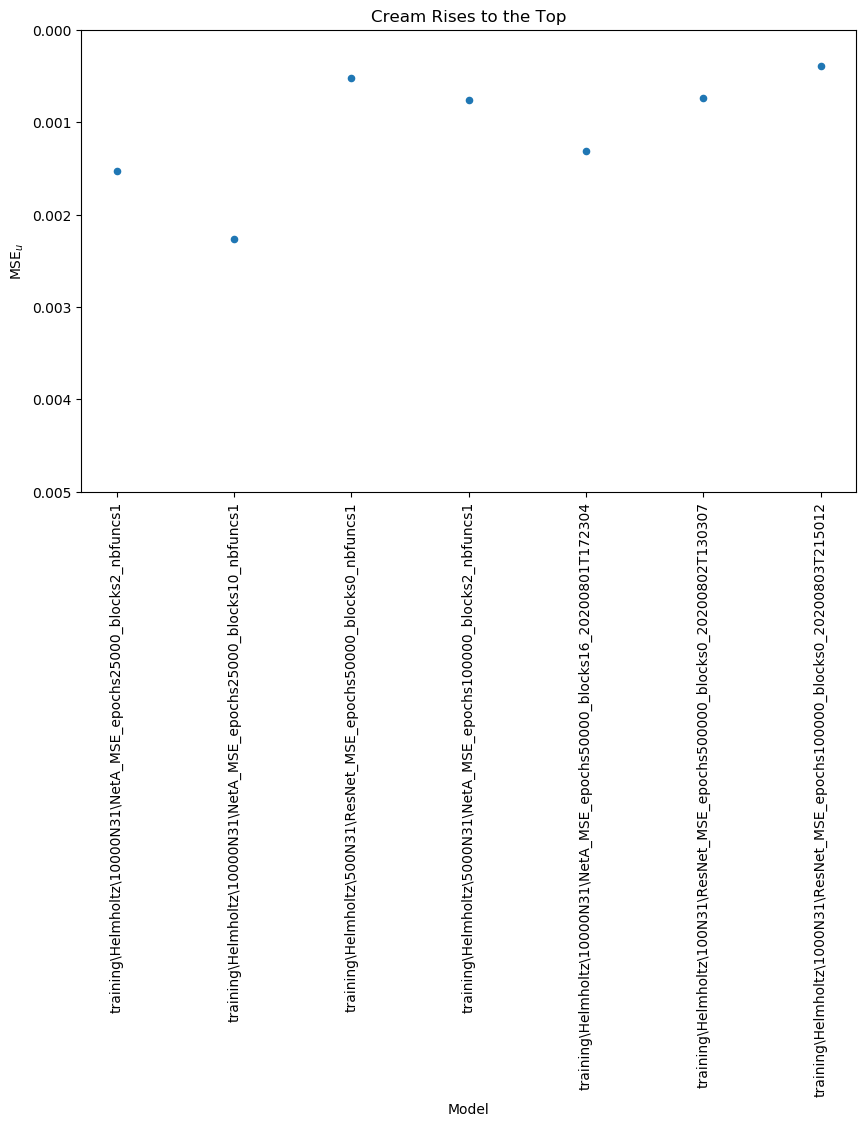

In [6]:
lim = .005
he = df[df['Equation'.upper()] == 'Helmholtz']
he['Model'] = he.index
he = he[he['MSEu'] <= lim]
he.plot(kind='scatter', x='Model', y='MSEu', figsize=(10,6))
plt.xticks(rotation=90)
plt.ylim(lim, 0)
plt.ylabel('MSE$_u$')
plt.title('Cream Rises to the Top')
plt.show()

In [7]:
samp = he.iloc[-2]
samp

losses         {'loss_a': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
EQUATION                                               Helmholtz
MODEL                                                     ResNet
KERNEL_SIZE                                                    5
BLOCKS                                                         0
EPSILON                                                        0
LOSS_TYPE                                                    MSE
FILTERS                                                       32
MAEa                                                       5e-05
MSEa                                                    0.002298
MIEa                                                    0.001223
MAEu                                                     5.6e-05
MSEu                                                    0.000738
MIEu                                                    0.001267
NBFUNCS                                                      NaN
Model          training\H

In [8]:
eq = 'Helmholtz'
paths = he.index.tolist()
dataset = []
for path in paths:
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dataset.append(folder.split('N')[0])
print(*dataset)

10000 10000 500 5000 10000 100 1000


training\Helmholtz\10000N31\NetA_MSE_epochs25000_blocks2_nbfuncs1
[0.73124055 0.28143855 0.45524674] , 10000
training\Helmholtz\10000N31\NetA_MSE_epochs25000_blocks10_nbfuncs1
[0.93151419 0.18130173 0.27213941] , 10000
training\Helmholtz\500N31\ResNet_MSE_epochs50000_blocks0_nbfuncs1
[0.17896909 0.55757428 0.96018065] , 500
training\Helmholtz\5000N31\NetA_MSE_epochs100000_blocks2_nbfuncs1
[0.17954132 0.55728816 0.95965746] , 5000
training\Helmholtz\10000N31\NetA_MSE_epochs50000_blocks16_20200801T172304
[0.44964298 0.42223734 0.71270737] , 10000
training\Helmholtz\100N31\ResNet_MSE_epochs500000_blocks0_20200802T130307
[0.15745891 0.56832937 0.97984709] , 100
training\Helmholtz\1000N31\ResNet_MSE_epochs100000_blocks0_20200803T215012
[0.16463023 0.56474371 0.97329046] , 1000


C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


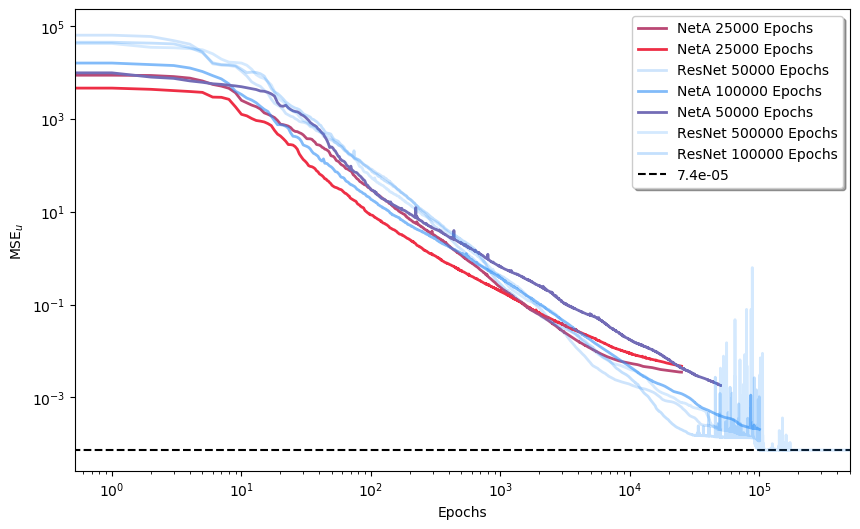

In [9]:
labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    cnorm = 255
    cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
    cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red
    c = (cend-cstart)/(5E-3-7E-5)*(he.iloc[dpoint]['losses']['loss_u'][-1] - 5E-3) + cend
    path = he.index[dpoint]
    print(path)
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = (0.8/9900)*(dsize-10000)+1
    print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    label = label[0] + " " + label[2].split('epochs')[-1] + ' Epochs'
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, 500000, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, 500000)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()

[0.73124055 0.28143855 0.45524674] , 10000 , 1.0
[0.93151419 0.18130173 0.27213941] , 10000 , 1.0
[0.17954132 0.55728816 0.95965746] , 5000 , 0.595959595959596
[0.44964298 0.42223734 0.71270737] , 10000 , 1.0


C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


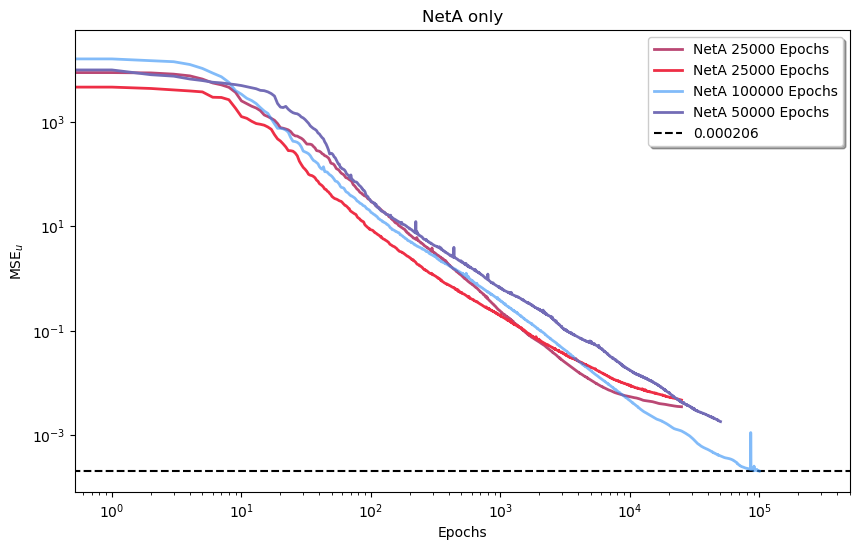

In [10]:
labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    cnorm = 255
    cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
    cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red
    c = (cend-cstart)/(5E-3-7E-5)*(he.iloc[dpoint]['losses']['loss_u'][-1] - 5E-3) + cend
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    if path[ind+2].split('_')[0] == 'ResNet':
        continue
    dsize = int(folder.split('N')[0])
    a = (0.8/9900)*(dsize-10000)+1
    print(c, ",", dsize, ",", a)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    label = label[0] + " " + label[2].split('epochs')[-1] + ' Epochs'
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, 500000, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, 500000)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.title('NetA only')
plt.show()

0.0002023380249738693
[0.93399611 0.18006077 0.26987022] , 500
7.356890011578799e-05
[0.15425228 0.56993268 0.98277887] , 100
0.00011649947613477707
[0.41421251 0.43995257 0.74510094] , 1000


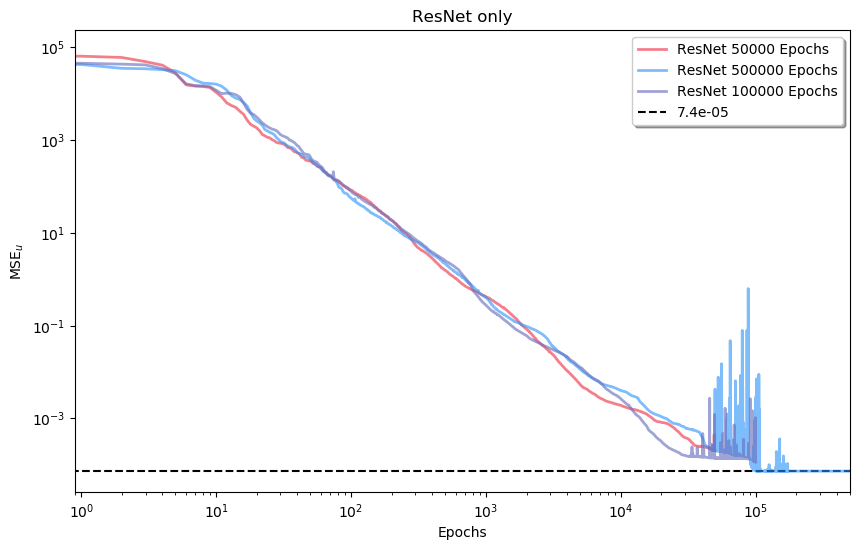

In [11]:
labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    cnorm = 255
    cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
    cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red
    c = (cend-cstart)/(2.1E-4-7.4E-5)*(he.iloc[dpoint]['losses']['loss_u'][-1] - 2.1E-4) + cend
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    if path[ind+2].split('_')[0] == 'NetA':
        continue
    dsize = int(folder.split('N')[0])
    a = 0.5*(0.8/9900)*(dsize-10000)+1
    print(he.iloc[dpoint]['losses']['loss_u'][-1])
    print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    label = label[0] + " " + label[2].split('epochs')[-1] + ' Epochs'
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, 500000, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(9E-1, 500000)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.title('ResNet only')
plt.show()

[0.73124055 0.28143855 0.45524674] , 10000
[0.93151419 0.18130173 0.27213941] , 10000
[0.17896909 0.55757428 0.96018065] , 500
[0.17954132 0.55728816 0.95965746] , 5000
[0.44964298 0.42223734 0.71270737] , 10000
[0.15745891 0.56832937 0.97984709] , 100
[0.16463023 0.56474371 0.97329046] , 1000


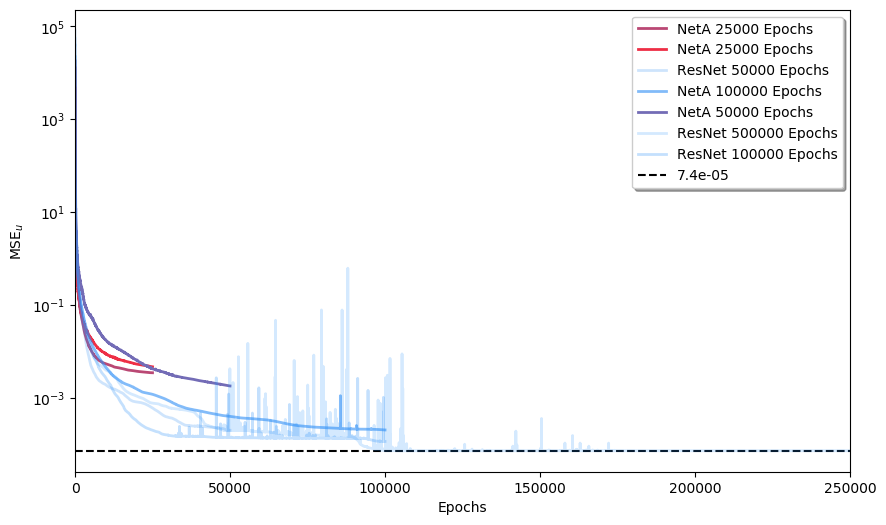

In [12]:
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
#     ema = he.iloc[dpoint]['losses']['loss_u']
    cnorm = 255
    cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
    cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red
    c = (cend-cstart)/(5E-3-7E-5)*(he.iloc[dpoint]['losses']['loss_u'][-1] - 5E-3) + cend
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = (0.8/9900)*(dsize-10000)+1
    print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    label = label[0] + " " + label[2].split('epochs')[-1] + ' Epochs'
    plt.semilogy(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, 250000, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, 250000)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()

# Burgers

In [13]:
he = df[df['Equation'.upper()] == 'Burgers']
he['Model'] = he.index

he

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu,NBFUNCS,Model
Burgers\10000N31\20200704T151344,"{'loss_a': [4.11263984375, 3.829959375, 0.4715...",Burgers,ResNet,5,0,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\10000N31\20200704T151344
Burgers\10000N31\20200704T155342,"{'loss_a': [1.6950903832912446e-05, 1.59778282...",Burgers,NetA,5,0,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\10000N31\20200704T155342
Burgers\10000N31\20200704T185742,"{'loss_a': [8.698078989982605e-06, 8.079208433...",Burgers,NetA,5,1,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\10000N31\20200704T185742
Burgers\10000N31\20200704T234530,"{'loss_a': [1.7742741107940676e-05, 1.09560400...",Burgers,NetA,5,2,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\10000N31\20200704T234530
Burgers\500N31\20200704T234934,"{'loss_a': [0.1921529541015625, 0.176739135742...",Burgers,NetA,5,2,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N31\20200704T234934
Burgers\500N63\20200705T010052,"{'loss_a': [0.27393838500976564, 0.25555635070...",Burgers,NetA,5,2,0.5,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N63\20200705T010052
Burgers\500N63\20200705T122621,"{'loss_a': [0.00010652643442153931, 0.00010319...",Burgers,NetA,5,2,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N63\20200705T122621
Burgers\500N63\20200705T123700,"{'loss_a': [0.00011387012153863906, 0.00010978...",Burgers,NetA,5,2,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N63\20200705T123700
Burgers\500N63\20200705T124447,"{'loss_a': [1.2506781005859375, 1.198227539062...",Burgers,NetA,5,2,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N63\20200705T124447
Burgers\500N31\20200705T124756,"{'loss_a': [1.2893927001953125, 1.190224121093...",Burgers,NetA,5,2,0.5,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burgers\500N31\20200705T124756


C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


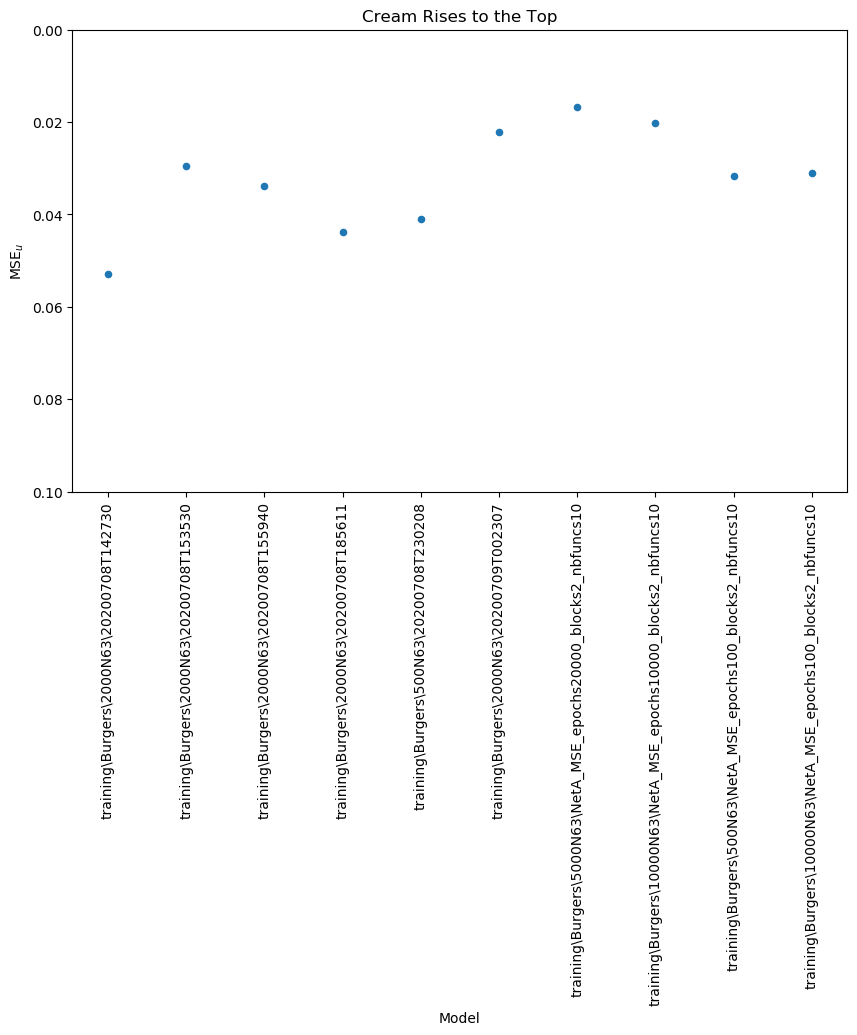

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


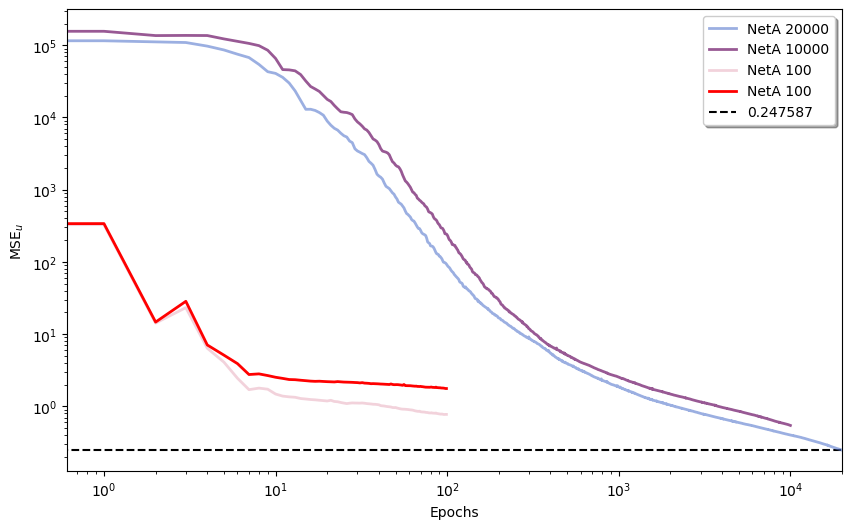

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


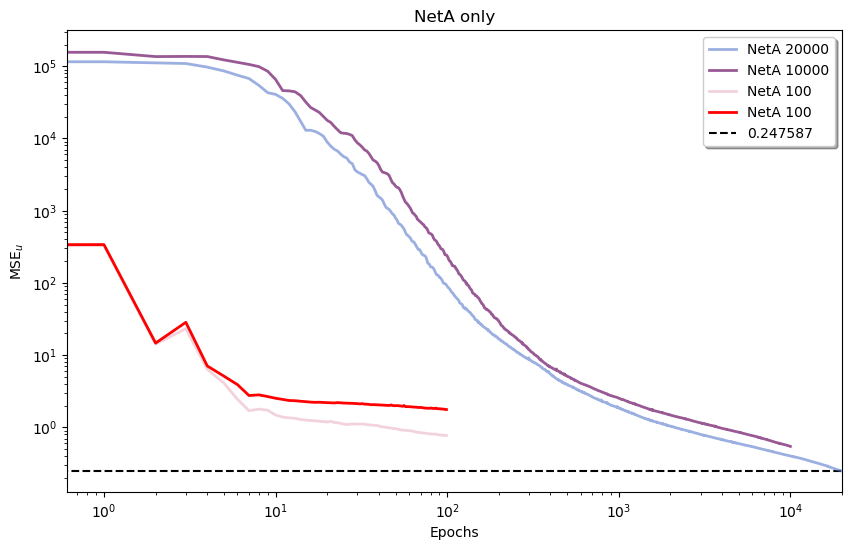

[0.24758671875, 0.543951806640625, 0.7719236450195313, 1.7641734375]


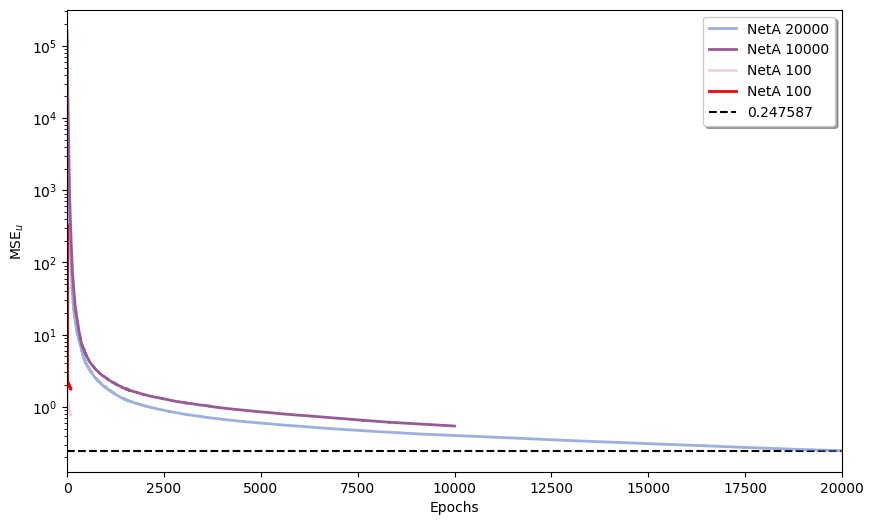

In [42]:
eq = 'Burgers'
MAX_EPOCHS = 20000
FLOOR = 0.023
cnorm = 255
cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red

lim = .1
he = df[df['Equation'.upper()] == 'Burgers']
he['Model'] = he.index
he = he[he['MSEu'] <= lim]
he.plot(kind='scatter', x='Model', y='MSEu', figsize=(10,6))
plt.xticks(rotation=90)
plt.ylim(lim, 0)
plt.ylabel('MSE$_u$')
plt.title('Cream Rises to the Top')
plt.show()


paths = he.index.tolist()
dataset = []
for path in paths:
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dataset.append(folder.split('N')[0])
# print(*dataset)

labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
#     print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()

labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    if path[ind+2].split('_')[0] == 'ResNet':
        continue
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
#     print(c, ",", dsize, ",", a)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.title('NetA only')
plt.show()

# labels = {
#     'loss_u': 'MSE$_u$',
# }
# vals = []
# plt.figure(figsize=(10,6))
# for dpoint in range(-len(he), 0):
#     cnorm = 255
#     cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
#     cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red
#     c = cend #+ (cend-cstart)/(2.1E-4-7E-5)*(he.iloc[dpoint]['losses']['loss_u'][-1] - 2.1E-4)
#     path = he.index[dpoint]
#     path = path.split('\\')
#     ind = path.index(eq)
#     folder = path[ind+1]
#     if path[ind+2].split('_')[0] == 'NetA':
#         continue
#     dsize = int(folder.split('N')[0])
#     a = 1 #+ (0.8/9900)*(dsize-10000)
#     print(he.iloc[dpoint]['losses']['loss_u'][-1])
#     print(c, ",", dsize)
#     label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
#     if len(label) == 1:
#         continue
#     label = label[0] + " " + label[2].split('epochs')[-1]
#     plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
#     vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
# print(vals)
# plt.hlines(0, 0, MAX_EPOCHS, label='np.round(min(vals),6)', linestyle='dashed')
# plt.legend(shadow=True, loc=1)
# plt.xlim(9E-1, MAX_EPOCHS)
# plt.xlabel('Epochs')
# plt.ylabel('MSE$_u$')
# plt.title('ResNet only')
# plt.show()

vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
    a = np.clip(a, 0, 1)
#     print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.semilogy(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
print(vals)
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()



# Standard

In [43]:
eq = 'Standard'
he = df[df['Equation'.upper()] == eq]
he['Model'] = he.index
he

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,losses,EQUATION,MODEL,KERNEL_SIZE,BLOCKS,EPSILON,LOSS_TYPE,FILTERS,MAEa,MSEa,MIEa,MAEu,MSEu,MIEu,NBFUNCS,Model
Standard\500N31\20200704T115102,"{'loss_a': [0.0014008926153182984, 0.001366454...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard\500N31\20200704T115102
Standard\500N31\20200704T120619,"{'loss_a': [0.0010492830276489257, 0.001015375...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard\500N31\20200704T120619
Standard\10000N31\20200704T121209,"{'loss_a': [5.839865803718567e-05, 5.647708177...",Standard,ResNet,5,0,0.1,MAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard\10000N31\20200704T121209
Standard\10000N31\20200704T124332,"{'loss_a': [8.24008125, 7.69129140625, 0.36565...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard\10000N31\20200704T124332
Standard\500N63\20200705T141346,"{'loss_a': [5027.1965, 4895.7425, 3674.674, 34...",Standard,NetA,5,2,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard\500N63\20200705T141346
training\Standard\50N63\20200706T171338,"{'loss_a': [176498.48, 168086.14, 56158.3, 290...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Standard\50N63\20200706T171338
training\Standard\50N63\20200706T172448,"{'loss_a': [176750.04, 167924.2, 46831.14, 367...",Standard,ResNet,5,1,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Standard\50N63\20200706T172448
training\Standard\50N63\20200706T173028,"{'loss_a': [223864.8, 213319.06, 64571.925, 27...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Standard\50N63\20200706T173028
training\Standard\50N63\20200706T180604,"{'loss_a': [204682.52, 195152.1, 92241.35, 516...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Standard\50N63\20200706T180604
training\Standard\50N63\20200706T180742,"{'loss_a': [166350.56, 158705.15, 86889.37, 56...",Standard,ResNet,5,0,0.1,MSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,training\Standard\50N63\20200706T180742


C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


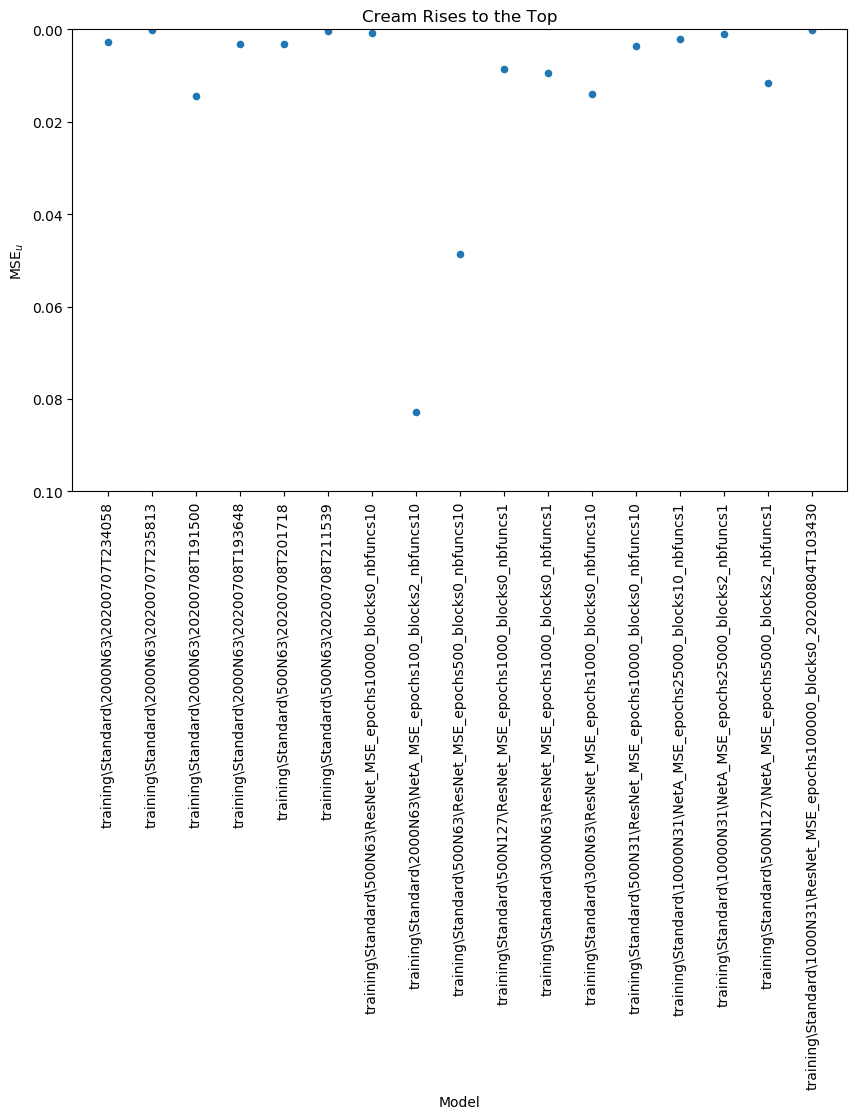

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


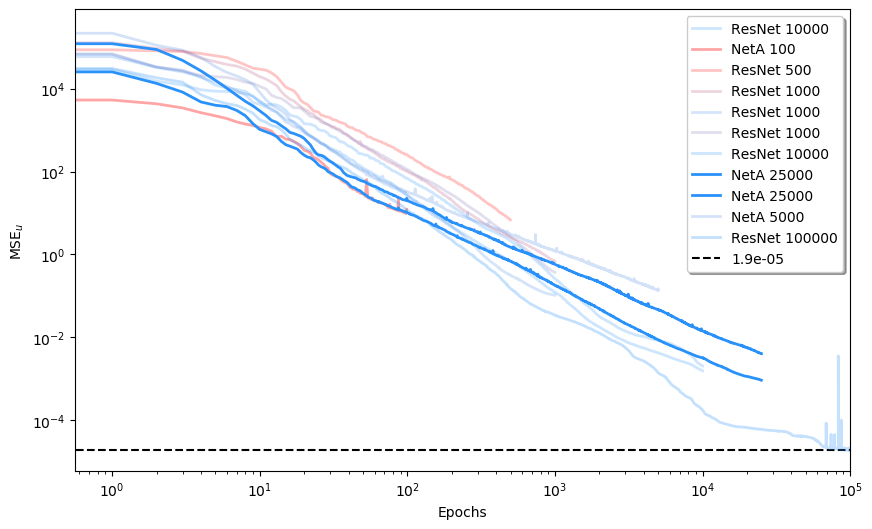

C:\Users\Alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


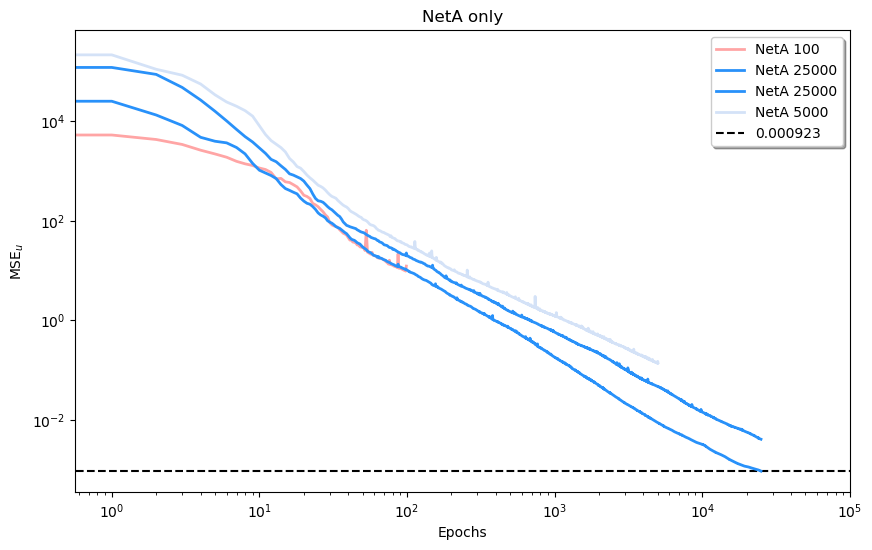

[0.0015529948472976685, 9.7327646484375, 6.8270419921875, 0.6668187866210937, 0.104305845896403, 0.3696194712320964, 0.002043044328689575, 0.004040197372436523, 0.0009227110862731933, 0.1358865203857422, 1.8965445458889006e-05]


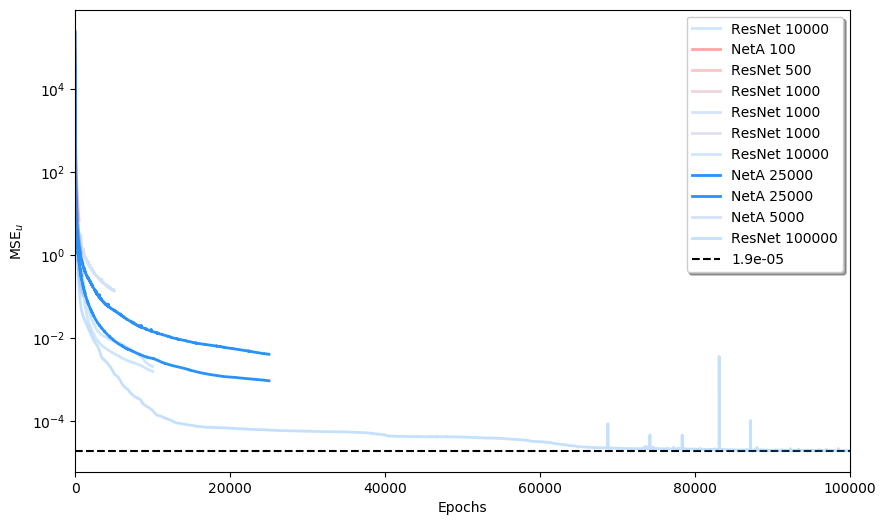

In [47]:
eq = 'Standard'
MAX_EPOCHS = 100000
FLOOR = 0.0001
cnorm = 255
cstart = np.array([40/cnorm, 145/cnorm, 250/cnorm]) #Blue
cend = np.array([250/cnorm, 40/cnorm, 58/cnorm]) #Red

lim = .1
he = df[df['Equation'.upper()] == eq]
he['Model'] = he.index
he = he[he['MSEu'] <= lim]
he.plot(kind='scatter', x='Model', y='MSEu', figsize=(10,6))
plt.xticks(rotation=90)
plt.ylim(lim, 0)
plt.ylabel('MSE$_u$')
plt.title('Cream Rises to the Top')
plt.show()


paths = he.index.tolist()
dataset = []
for path in paths:
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dataset.append(folder.split('N')[0])
# print(*dataset)

labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
#     print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()

labels = {
    'loss_u': 'MSE$_u$',
}
vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    if path[ind+2].split('_')[0] == 'ResNet':
        continue
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
#     print(c, ",", dsize, ",", a)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.title('NetA only')
plt.show()

# labels = {
#     'loss_u': 'MSE$_u$',
# }
# vals = []
# plt.figure(figsize=(10,6))
# for dpoint in range(-len(he), 0):
#     c = cend + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
#     c = np.clip(c, 0, 1)
#     path = he.index[dpoint]
#     path = path.split('\\')
#     ind = path.index(eq)
#     folder = path[ind+1]
#     if path[ind+2].split('_')[0] == 'NetA':
#         continue
#     dsize = int(folder.split('N')[0])
#     a = 1 + (0.8/9900)*(dsize-10000)
#     a = np.clip(a, 0, 1)
# #     print(he.iloc[dpoint]['losses']['loss_u'][-1])
# #     print(c, ",", dsize)
#     label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
#     if len(label) == 1:
#         continue
#     label = label[0] + " " + label[2].split('epochs')[-1]
#     plt.loglog(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
#     vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
# print(vals)
# plt.hlines(0, 0, MAX_EPOCHS, label='np.round(min(vals),6)', linestyle='dashed')
# plt.legend(shadow=True, loc=1)
# plt.xlim(9E-1, MAX_EPOCHS)
# plt.xlabel('Epochs')
# plt.ylabel('MSE$_u$')
# plt.title('ResNet only')
# plt.show()

vals = []
plt.figure(figsize=(10,6))
for dpoint in range(-len(he), 0):
    c = cstart + (cend-cstart)/(1-FLOOR)*(he.iloc[dpoint]['losses']['loss_u'][-1] - FLOOR)
    c = np.clip(c, 0, 1)
    path = he.index[dpoint]
    path = path.split('\\')
    ind = path.index(eq)
    folder = path[ind+1]
    dsize = int(folder.split('N')[0])
    a = 1 + (0.8/9900)*(dsize-10000)
    a = np.clip(a, 0, 1)
#     print(c, ",", dsize)
    label = he.iloc[dpoint]['Model'].split('\\')[-1].split('_')
    if len(label) == 1:
        continue
    label = label[0] + " " + label[2].split('epochs')[-1]
    plt.semilogy(list(range(len(he.iloc[dpoint]['losses']['loss_u']))), he.iloc[dpoint]['losses']['loss_u'], linewidth=2, color=c, alpha=a, label=label)
    vals.append(min(he.iloc[dpoint]['losses']['loss_u']))
print(vals)
plt.hlines(min(vals), 0, MAX_EPOCHS, label=np.round(min(vals),6), linestyle='dashed')
plt.legend(shadow=True, loc=1)
plt.xlim(0, MAX_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('MSE$_u$')
plt.show()

